<a href="https://colab.research.google.com/github/tomonari-masada/course-nlp2020/blob/master/11_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Ê®ôÊ∫ñ‰ΩøÁî®„É©„Ç§„Éñ„É©„É™„Éº
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc
import os
import shutil
from icecream import ic
from tqdm import tqdm_notebook as tqdm 

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ËøΩË®ò
import json
import datetime
import math
plt.style.use('dark_background')

# debug
#%pdb on

import pixiedust #%pixie_debugger

# tf„Åå„Ç®„É©„Éº„ÅØ„Åã„Å™„ÅÑ„Åü„ÇÅ
# tf„Åå„Ç®„É©„Éº„ÅØ„Åã„Å™„ÅÑ„Åü„ÇÅ
#import tensorflow as tf
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="5"
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)


Pixiedust database opened successfully


In [2]:
import pandas as pd
import re
import emoji
from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv("./result0605.csv", engine='python')

type(df["description"])
docs = df["description"].to_list()

In [3]:
print(len(docs))

93794


In [4]:
print(docs[0][:1000])

Êº´Áîª„ÄÅ„Ç¢„Éã„É°„ÄÅÂ£∞ÂÑ™Âû¢„ÄÇ RTÂ§ö„ÇÅÊ∞ó„Åæ„Åæ„Å´Âëü„Åç„Åæ„Åô„ÄÇ‰ºèÁ∑öÁ≥ª„ÅÆÊº´ÁîªÂ•Ω„Åç„ÄÇÂè§Â∑ùÊÖé„Åï„Çì„ÉªÂ∞èÊûóË£ï‰ªã„Åï„Çì„ÉªÊ≤≥Ë•øÂÅ•Âêæ„Åï„Çì „ÉªÁî∞‰∏∏ÁØ§Âøó„Åï„ÇìÊé®„Åó


### Neologd„Çí‰Ωø„Å£„Å¶tokenize„Åô„Çã

In [5]:
docs

['Êº´Áîª„ÄÅ„Ç¢„Éã„É°„ÄÅÂ£∞ÂÑ™Âû¢„ÄÇ RTÂ§ö„ÇÅÊ∞ó„Åæ„Åæ„Å´Âëü„Åç„Åæ„Åô„ÄÇ‰ºèÁ∑öÁ≥ª„ÅÆÊº´ÁîªÂ•Ω„Åç„ÄÇÂè§Â∑ùÊÖé„Åï„Çì„ÉªÂ∞èÊûóË£ï‰ªã„Åï„Çì„ÉªÊ≤≥Ë•øÂÅ•Âêæ„Åï„Çì „ÉªÁî∞‰∏∏ÁØ§Âøó„Åï„ÇìÊé®„Åó',
 'DÂû¢„ÄÇ„Éó„É™„É≥„Çª„Çπ„Çà„ÅèÊèè„ÅÑ„Å¶„Åë„Å©‚Ä¶„Åü„Åæ„Å´ÈÅï„ÅÜ„ÇÇ„ÅÆ„ÇÇÊèè„Åç„Åæ„Åô„ÄÇÊâãÈÅÖ„ÇÅ„Åß„Åô„Åå„Çà„Çç„Åó„Åè„ÅäÈ°ò„ÅÑ„Åó„Åæ„Åôüôáüôá ‚ÄªÂêçÂâç„ÅÆË™≠„ÅøÊñπ„ÅØËá™Áî±„Å™„Çì„ÅßÂ•Ω„Åç„Å™„Çà„ÅÜ„Å´Ë™≠„Çì„Åß„Åè„Å†„Åï„ÅÑ ÊúÄËøë„ÅØ‰ΩéÊµÆ‰∏ä„Å™„ÅÆ„Åß‚Ä¶Âà•„ÅÆÁµµÂû¢ ‚Üí@ri_ri_ri_ri_on',
 'ùñíùñîùñîùñìùñéùñÜùñì ‚ô§  ùî£ùî±ùî¶ùî∞ùî©ùîûùî´ùî°  ‚ô¢ ùñíùñéùñûùñÜùñõùñé  ‚ôß  ùî•ùî¨ùî¶ùî∑ùî¢ùîØ  ‚ô°  ùñáùñáùñü  ‚ú©  ùî™ùî¢ùî©ùî©ùî¨ùî¥ùî™ùî¨ùî±ùî¶ùî£\nÀóÀèÀã‚ãÜ¬∑Àö ‡ºò * „Ç¢„É©„É©„Ç´„Çø„Éñ„É©„ÉÑ„É´„É™„É≥„Ç≥ÔΩ´„Ç©„Ç©„Ç™!!‚ú©‚Äß‚ÇäÀö¬¥ÀéÀó.',
 'ENHYPEN„ÄÅ„Ç¢„Éã„É°„ÉªÊº´Áîª „Ç≤„Éº„É†Èñ¢ÈÄ£„ÅßTwitter‰Ωø„Å£„Å¶„Çã„ÅÆ„Åß„ÄÅ„Åù„Çå‰ª•Â§ñ„ÅØÁÑ°ÂèçÂøú„Åß„Åô„ÄÅ„ÄÅ',
 '„ÄêÂøÉ„Å´„ÇÜ„Å®„Çä„Å®ÊΩ§„ÅÑ„Çíüíû„ÄëÁõÆÊåá„Åô„ÅÆ„ÅØÂ≠¶Ê†°„ÅÆ‰øùÂÅ•ÂÆ§„ÅÆ„Çà„ÅÜ„Å™Â†¥ÊâÄ„Éª„Éõ„ÉÉ„Å®‰∏ÄÊÅØ„Å§„Åë„ÇãÂ†

In [6]:
import subprocess
cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path_neologd = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')
import MeCab
m=MeCab.Tagger("-Ochasen -d "+str(path_neologd))


def neolog_prep_text( text):
  return_words = []
  splited_text = (re.split('[\t,]', line) for line in m.parse(text).split('\n'))
  for tmp_word in splited_text :
    if (tmp_word[0] in ('EOS', '', 't', '„Éº') ):
       continue 
    if not re.match( 'ÂêçË©û' ,tmp_word[3]  ) or tmp_word[0] in emoji.UNICODE_EMOJI["en"]:
      continue
    else:
      return_words.append(tmp_word[0])
    
    
    # 1Âõû„Åó„Åã„Åß„Å¶„Åì„Å™„ÅÑ„ÅÆ„ÇíÂâä„Çã„ÄÇ

  return return_words

* tokenization„ÅÆÂÆüË°å

In [7]:
from tqdm import tqdm

new_docs = list()
for doc in tqdm(docs):
  if str(doc) == "nan":
    continue
  tmp_words =  neolog_prep_text(str(doc))
  new_docs.append( tmp_words )
  

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 93794/93794 [00:24<00:00, 3864.04it/s]


* tokenization„ÅÆÁµêÊûú„ÇíÁ¢∫Ë™ç

In [8]:
print(new_docs[5])

['ÈÅéÂéª', '„Ç∏„É£„Éë„É™„Ç´„Éº„Éà', 'ÂãïÁîª', 'TSUMURI', 'KART', 'VRChat', '„ÉØ„É™„Çπ„Éé', 'MK', '8', 'DX', '‰∏Ä‰Ωç', '„Çä„Åó', '„Åü‰∫∫', 'Á§æ‰ºö', 'Âá∫„Å¶', 'ÈÖç‰ø°', 'https', 'co', 'FJoitl', '8', 'JHE', '„Éò„ÉÉ„ÉÄ', 'Áå´', 'È£º„ÅÑ‰∏ª', 'smmmmm']


* ÂêÑÊñáÊõ∏„ÇíÈï∑„ÅÑÊñáÂ≠óÂàó„ÅßË°®„Åó„Å™„Åä„ÅôÔºàCountVectorizer„ÇíÂæå„Åß‰Ωø„ÅÜ„Åü„ÇÅÔºâ

In [9]:
corpus = [' '.join(doc) for doc in new_docs]

In [10]:
new_docs

[['Êº´Áîª',
  '„Ç¢„Éã„É°',
  'Â£∞ÂÑ™',
  'Âû¢',
  'RT',
  'Â§ö„ÇÅ',
  'Ê∞ó„Åæ„Åæ',
  '‰ºèÁ∑ö',
  'Á≥ª',
  'Êº´Áîª',
  'Â•Ω„Åç',
  'Âè§Â∑ùÊÖé',
  '„Åï„Çì',
  'Â∞èÊûóË£ï‰ªã',
  '„Åï„Çì',
  'Ê≤≥Ë•øÂÅ•Âêæ',
  '„Åï„Çì',
  'Áî∞‰∏∏ÁØ§Âøó',
  '„Åï„Çì'],
 ['D',
  'Âû¢',
  '„Éó„É™„É≥„Çª„Çπ',
  '„Åü„Åæ',
  '„ÇÇ„ÅÆ',
  'ÊâãÈÅÖ',
  '„ÇÅ',
  '„Çà„Çç„Åó„Åè„ÅäÈ°ò„ÅÑ„Åó„Åæ„Åô',
  'ÂêçÂâç',
  'Ë™≠„ÅøÊñπ',
  'Ëá™Áî±',
  'Â•Ω„Åç',
  '„Çà„ÅÜ',
  'ÊúÄËøë',
  'ÊµÆ‰∏ä',
  'Âà•',
  'Áµµ',
  'Âû¢',
  'ri',
  'ri',
  'ri',
  'ri',
  'on'],
 ['„Ç¢„É©„É©„Ç´„Çø„Éñ„É©„ÉÑ„É´„É™„É≥„Ç≥ÔΩ´„Ç©„Ç©„Ç™', '‚Çä'],
 ['ENHYPEN', '„Ç¢„Éã„É°', 'Êº´Áîª', '„Ç≤„Éº„É†', 'Èñ¢ÈÄ£', 'Twitter', '„Åù„Çå', '‰ª•Â§ñ', 'ÂèçÂøú'],
 ['ÂøÉ',
  '„ÇÜ„Å®„Çä',
  'ÊΩ§„ÅÑ',
  '„ÅÆ',
  'Â≠¶Ê†°',
  '‰øùÂÅ•ÂÆ§',
  '„Çà„ÅÜ',
  'Â†¥ÊâÄ',
  '‰∏ÄÊÅØ',
  'Â†¥ÊâÄ',
  '„ÅÇ„Å™„Åü',
  'Âπ∏„Åõ',
  'ËÅ∑Ê•≠',
  'Èü≥Ê•Ω',
  'Ë¨õÂ∏´',
  'Ëá™ÂàÜÁ£®„Åç',
  '‰∏≠',
  'Ëá™ÂàÜ',
  '„Åü„ÇÅ',
  '„ÉÑ„Ç§„Éº„Éà',
  '‰∫ã',
  '„Éâ„Ç∏',
  'Êúâ„Çä',
  '2',
  'Âåπ',
  '4',
  'Âåπ'],


## 11-02 „Éá„Éº„ÇøË°åÂàó„ÅÆ‰ΩúÊàê
* NMF„ÅÆÂ†¥Âêà„ÄÅTF-IDF„ÅßÂçòË™û„ÅÆÈáç„Åø„ÇíÊ±Ç„ÇÅ„Å¶ÂêÑÊñáÊõ∏„Çí„Éô„ÇØ„Éà„É´Âåñ„Åô„Çã„ÄÇ
* LDA„ÅÆÂ†¥Âêà„ÄÅÂçò„Å´ÂçòË™û„ÅÆÂá∫ÁèæÈ†ªÂ∫¶„ÇíÈáç„Åø„Å®„Åó„Å¶ÂêÑÊñáÊõ∏„Çí„Éô„ÇØ„Éà„É´Âåñ„Åô„Çã„ÄÇ

### sklearn„ÅÆCountVectorizer„ÅßÁñéË°åÂàóÂåñ„Åô„Çã

* ÂÖ®ÊñáÊõ∏„ÅÆÂçäÂàÜ„Çà„ÇäÂ§ö„ÅÑÊñáÊõ∏„Å´Áèæ„Çå„ÇãÂçòË™û„ÅØ„ÄÅÈ´òÈ†ªÂ∫¶Ë™û„Å®„Åø„Å™„Åó„Å¶ÂâäÈô§„Åô„Çã„ÄÇ
* 10‰ª∂Êú™Ê∫Ä„ÅÆÊñáÊõ∏„Å´„Åó„ÅãÁèæ„Çå„Å™„ÅÑÂçòË™û„ÅØ„ÄÅ‰ΩéÈ†ªÂ∫¶Ë™û„Å®„Åø„Å™„Åó„Å¶ÂâäÈô§„Åô„Çã„ÄÇ

In [11]:
import os
import urllib.request
def download_stopwords(path):
    url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
    if os.path.exists(path):
        print('File already exists.')
    else:
        print('Downloading...')
        # Download the file from `url` and save it locally under `file_name`:
        urllib.request.urlretrieve(url, path)

def create_stopwords(file_path):
    stop_words = []
    for w in open(path, "r"):
        w = w.replace('\n','')
        if len(w) > 0:
          stop_words.append(w)
    return stop_words    

path = "stop_words.txt"
download_stopwords(path)
stop_words = create_stopwords(path)

File already exists.


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.5, min_df=30, stop_words=stop_words)
X = vectorizer.fit_transform(corpus)

In [13]:
print(vectorizer.get_feature_names())

['00', '000', '01', '02', '03', '04', '05', '06', '07', '08', '09', '0m', '0t', '0v', '0w', '0Ê≠≥', '10', '100', '1000', '1000‰∫∫', '10Âπ¥', '10Âπ¥ÁõÆ', '10ÊôÇ', '10Êúà', '10Ê≠≥', '11', '110', '11Êúà', '11Ê≠≥', '12', '120', '123', '125', '12Âπ¥', '12Êúà', '12Ê≠≥', '13', '13Âπ¥', '13Ê≠≥', '14', '14Âπ¥', '14Ê≠≥', '15', '150', '15Âπ¥', '15Ê≠≥', '16', '16Âπ¥', '16Ê≠≥', '17', '17Ê≠≥', '18', '18Âπ¥', '18Ê≠≥', '18Ê≠≥‰ª•‰∏ä', '18Á¶Å', '19', '19Âπ¥', '19ÊôÇ', '19Ê≠≥', '1b', '1d', '1q', '1t', '1v', '1w', '1„Å§', '1‰∫∫', '1‰Ωç', '1ÂÖê', '1Âõû', '1Âπ¥', '1Âπ¥Áîü', '1Âπ¥ÁõÆ', '1Â∫¶', '1Êó•', '1Êúà', '1Ê≠≥', '1Áï™', '1Á¥ö', '20', '200', '2000', '2010', '2010Âπ¥', '2011', '2011Âπ¥', '2012', '2012Âπ¥', '2013', '2013Âπ¥', '2014', '2014Âπ¥', '2015', '2015Âπ¥', '2016', '2016Âπ¥', '2017', '2017Âπ¥', '2018', '2018Âπ¥', '2019', '2019Âπ¥', '2020', '2020Âπ¥', '2021', '2021Âπ¥', '20‰ª£', '20‰ª£ÂæåÂçä', '20Âπ¥', '20ÊôÇ', '20Ê≠≥', '21', '21ÊôÇ', '21Ê≠≥', '22', '22ÊôÇ', '22Ê≠≥', '23', '23Ê≠≥', '24', '24ÊôÇÈñì', '

In [14]:
print(len(vectorizer.get_feature_names()))

5100


* ÊñáÊõ∏Êï∞„Å®Ë™ûÂΩô„Çµ„Ç§„Ç∫„ÇíÂ§âÊï∞„Å´„Çª„ÉÉ„Éà

In [15]:
n_samples, n_features = X.shape

### TF-IDF„ÅßÂêÑÊñáÊõ∏„Å´„Åä„Åë„ÇãÂçòË™û„ÅÆÈáç„Åø„ÇíË®àÁÆó„Åô„Çã

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
Xtfidf = tfidf.fit_transform(X)

In [17]:
print(Xtfidf[0])

  (0, 4227)	0.603862693464167
  (0, 4148)	0.4706802938434637
  (0, 3490)	0.1847556021921528
  (0, 3414)	0.33418592758883475
  (0, 3402)	0.3582132311126842
  (0, 1747)	0.24047370992039763
  (0, 1109)	0.28609564411708244


In [18]:
Xtfidf.shape

(88481, 5100)

In [19]:
n_components = 8

## 11-03 NMF„Åß„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫
* „Åæ„Åö„ÄÅTF-IDF„ÅÆ„Éá„Éº„ÇøË°åÂàó„Çí‰Ωø„Å£„Å¶„ÄÄNMF„Å´„Çà„Å£„Å¶„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫„ÇíË©¶„Åø„Çã„ÄÇ
 * NMF„ÅÆ„Éë„É©„É°„Éº„ÇøÁæ§„ÅØ‰∏ãË®ò„Çµ„É≥„Éó„É´„Ç≥„Éº„Éâ„ÅÆ„Åæ„Åæ„ÄÇ
 * https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

### NMF„Å®LDA„ÅÆ„Ç§„É≥„Éù„Éº„Éà

In [20]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

### NMF„Å´„Çà„Çã„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫„ÅÆÂÆüË°å

In [21]:
from time import time

print((f"Fitting the NMF model (generalized Kullback-Leibler "
  f"divergence) with tf-idf features, n_samples={n_samples} "
  f"and n_features={n_features}"))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1, l1_ratio=.5,
          verbose=1)
nmf.fit(Xtfidf)
print(f"done in {time() - t0:0.3f}s.")

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=88481 and n_features=5100
Epoch 10 reached after 2.299 seconds, error: 1505.882560
Epoch 20 reached after 4.435 seconds, error: 1503.960840
Epoch 30 reached after 6.574 seconds, error: 1503.388781
Epoch 40 reached after 8.714 seconds, error: 1503.116205
Epoch 50 reached after 10.860 seconds, error: 1502.929890
Epoch 60 reached after 13.009 seconds, error: 1502.791030
done in 13.949s.


* NMF„Å´„Åä„Åë„ÇãÂêÑ„Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„ÅØ„ÄÅ„Åù„Çå„Åû„Çå„ÅÆ„Éà„Éî„ÉÉ„ÇØ„Å´„Åä„Åë„ÇãÂçòË™û„ÅÆÈáçË¶ÅÂ∫¶„ÇíË°®„Åô„Éô„ÇØ„Éà„É´„Å®„Åó„Å¶Ë°®Áèæ„Åï„Çå„Å¶„ÅÑ„Çã„ÄÇ

In [22]:
nmf.components_

array([[1.90754691e-03, 1.38892962e-15, 1.05341928e-02, ...,
        5.20358340e-04, 1.39101937e-03, 5.66794952e-03],
       [1.02606004e-01, 7.73614217e-03, 2.84622017e-02, ...,
        7.46313444e-03, 0.00000000e+00, 0.00000000e+00],
       [7.11351131e-03, 7.62933019e-15, 1.57643711e-02, ...,
        9.08120449e-03, 1.53444997e-02, 2.72581694e-02],
       ...,
       [8.20919155e-03, 7.34007149e-03, 3.71441203e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.62249073e-01, 7.39297642e-08, 1.17306792e-01, ...,
        2.76660085e-07, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.92853321e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### „Éà„Éî„ÉÉ„ÇØ„ÅÆÈáçË¶ÅË™û„ÇíÂèñ„ÇäÂá∫„ÅôÈñ¢Êï∞„ÅÆÂÆöÁæ©

In [23]:
def get_top_words(model, feature_names, n_top_words=30):
  top_features = list()
  weights = list()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features.append([feature_names[i] for i in top_features_ind])
    weights.append(topic[top_features_ind])
  return top_features, weights

### NMF„ÅÆÂêÑ„Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„Åã„ÇâÈáçË¶ÅË™û„ÇíÂèñ„ÇäÂá∫„Åô

In [24]:
top_words, weights = get_top_words(nmf, vectorizer.get_feature_names())

In [25]:
topic_words = [dict(zip(top_words[i], weights[i])) for i in range(n_components)]

In [26]:
topic_words[0]

{'Â•Ω„Åç': 4.103561187905856,
 'Êò†Áîª': 0.5315387393311308,
 'Èü≥Ê•Ω': 0.41431443245389565,
 'È¨ºÊªÖ„ÅÆÂàÉ': 0.3270085230577755,
 'ÊúÄËøë': 0.3126112676608199,
 'Ë∂£Âë≥': 0.2872958539668996,
 '„Ç¢„Éã„É°': 0.2869918530392826,
 'ÂãïÁâ©': 0.275933891461783,
 'ÂÜôÁúü': 0.2360770362433886,
 'ÁâπÊíÆ': 0.22549088407547632,
 '„Éê„Ç§„ÇØ': 0.20338502455537907,
 '„Éï„Ç°„É≥': 0.19834733293741058,
 '„Åä„Åò„Åï„Çì': 0.19702775838594988,
 'Êº´Áîª': 0.1920570610451646,
 '„Ç´„É°„É©': 0.1807495261802483,
 '‰ΩúÂìÅ': 0.17139416059942497,
 '„Éï„Ç©„É≠„Éº': 0.1709908814945777,
 'ÂÖàÁîü': 0.16624620182239117,
 'ÂøúÊè¥': 0.1647405475615883,
 '„Éá„Ç£„Ç∫„Éã„Éº': 0.16290116282428538,
 'Ë™≠Êõ∏': 0.1535491360374692,
 '„Åä„Å£„Åï„Çì': 0.15195349289906301,
 'Ê∞óËªΩ': 0.14873212461521124,
 'ÈáéÁêÉ': 0.14561156863762467,
 '‰ªÆÈù¢„É©„Ç§„ÉÄ„Éº': 0.144788295139377,
 'ÈâÑÈÅì': 0.1438294936509801,
 'etc': 0.13752199434160717,
 'ÊãÖÂΩì': 0.13729905718906268,
 'Áî∑Â≠ê': 0.13424759419158924,
 '„Å≠„Åì': 0.13406788313179405}

### ÈáçË¶ÅË™û„Çí„ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÅßÂèØË¶ñÂåñ

In [27]:
from matplotlib import pyplot as plt

* „ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„Åã„ÇâÈô§Âéª„Åô„Çã„Çπ„Éà„ÉÉ„Éó„ÉØ„Éº„Éâ„ÇíÁ¢∫Ë™ç„Åô„Çã„ÄÇ

* „ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÇíÊèèÁîª

In [28]:
FONT_PATH = "/usr/share/fonts/opentype/ipaexfont-mincho/ipaexm.ttf"
cloud = WordCloud(stopwords=STOPWORDS,
                  font_path=FONT_PATH,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10'
                  )

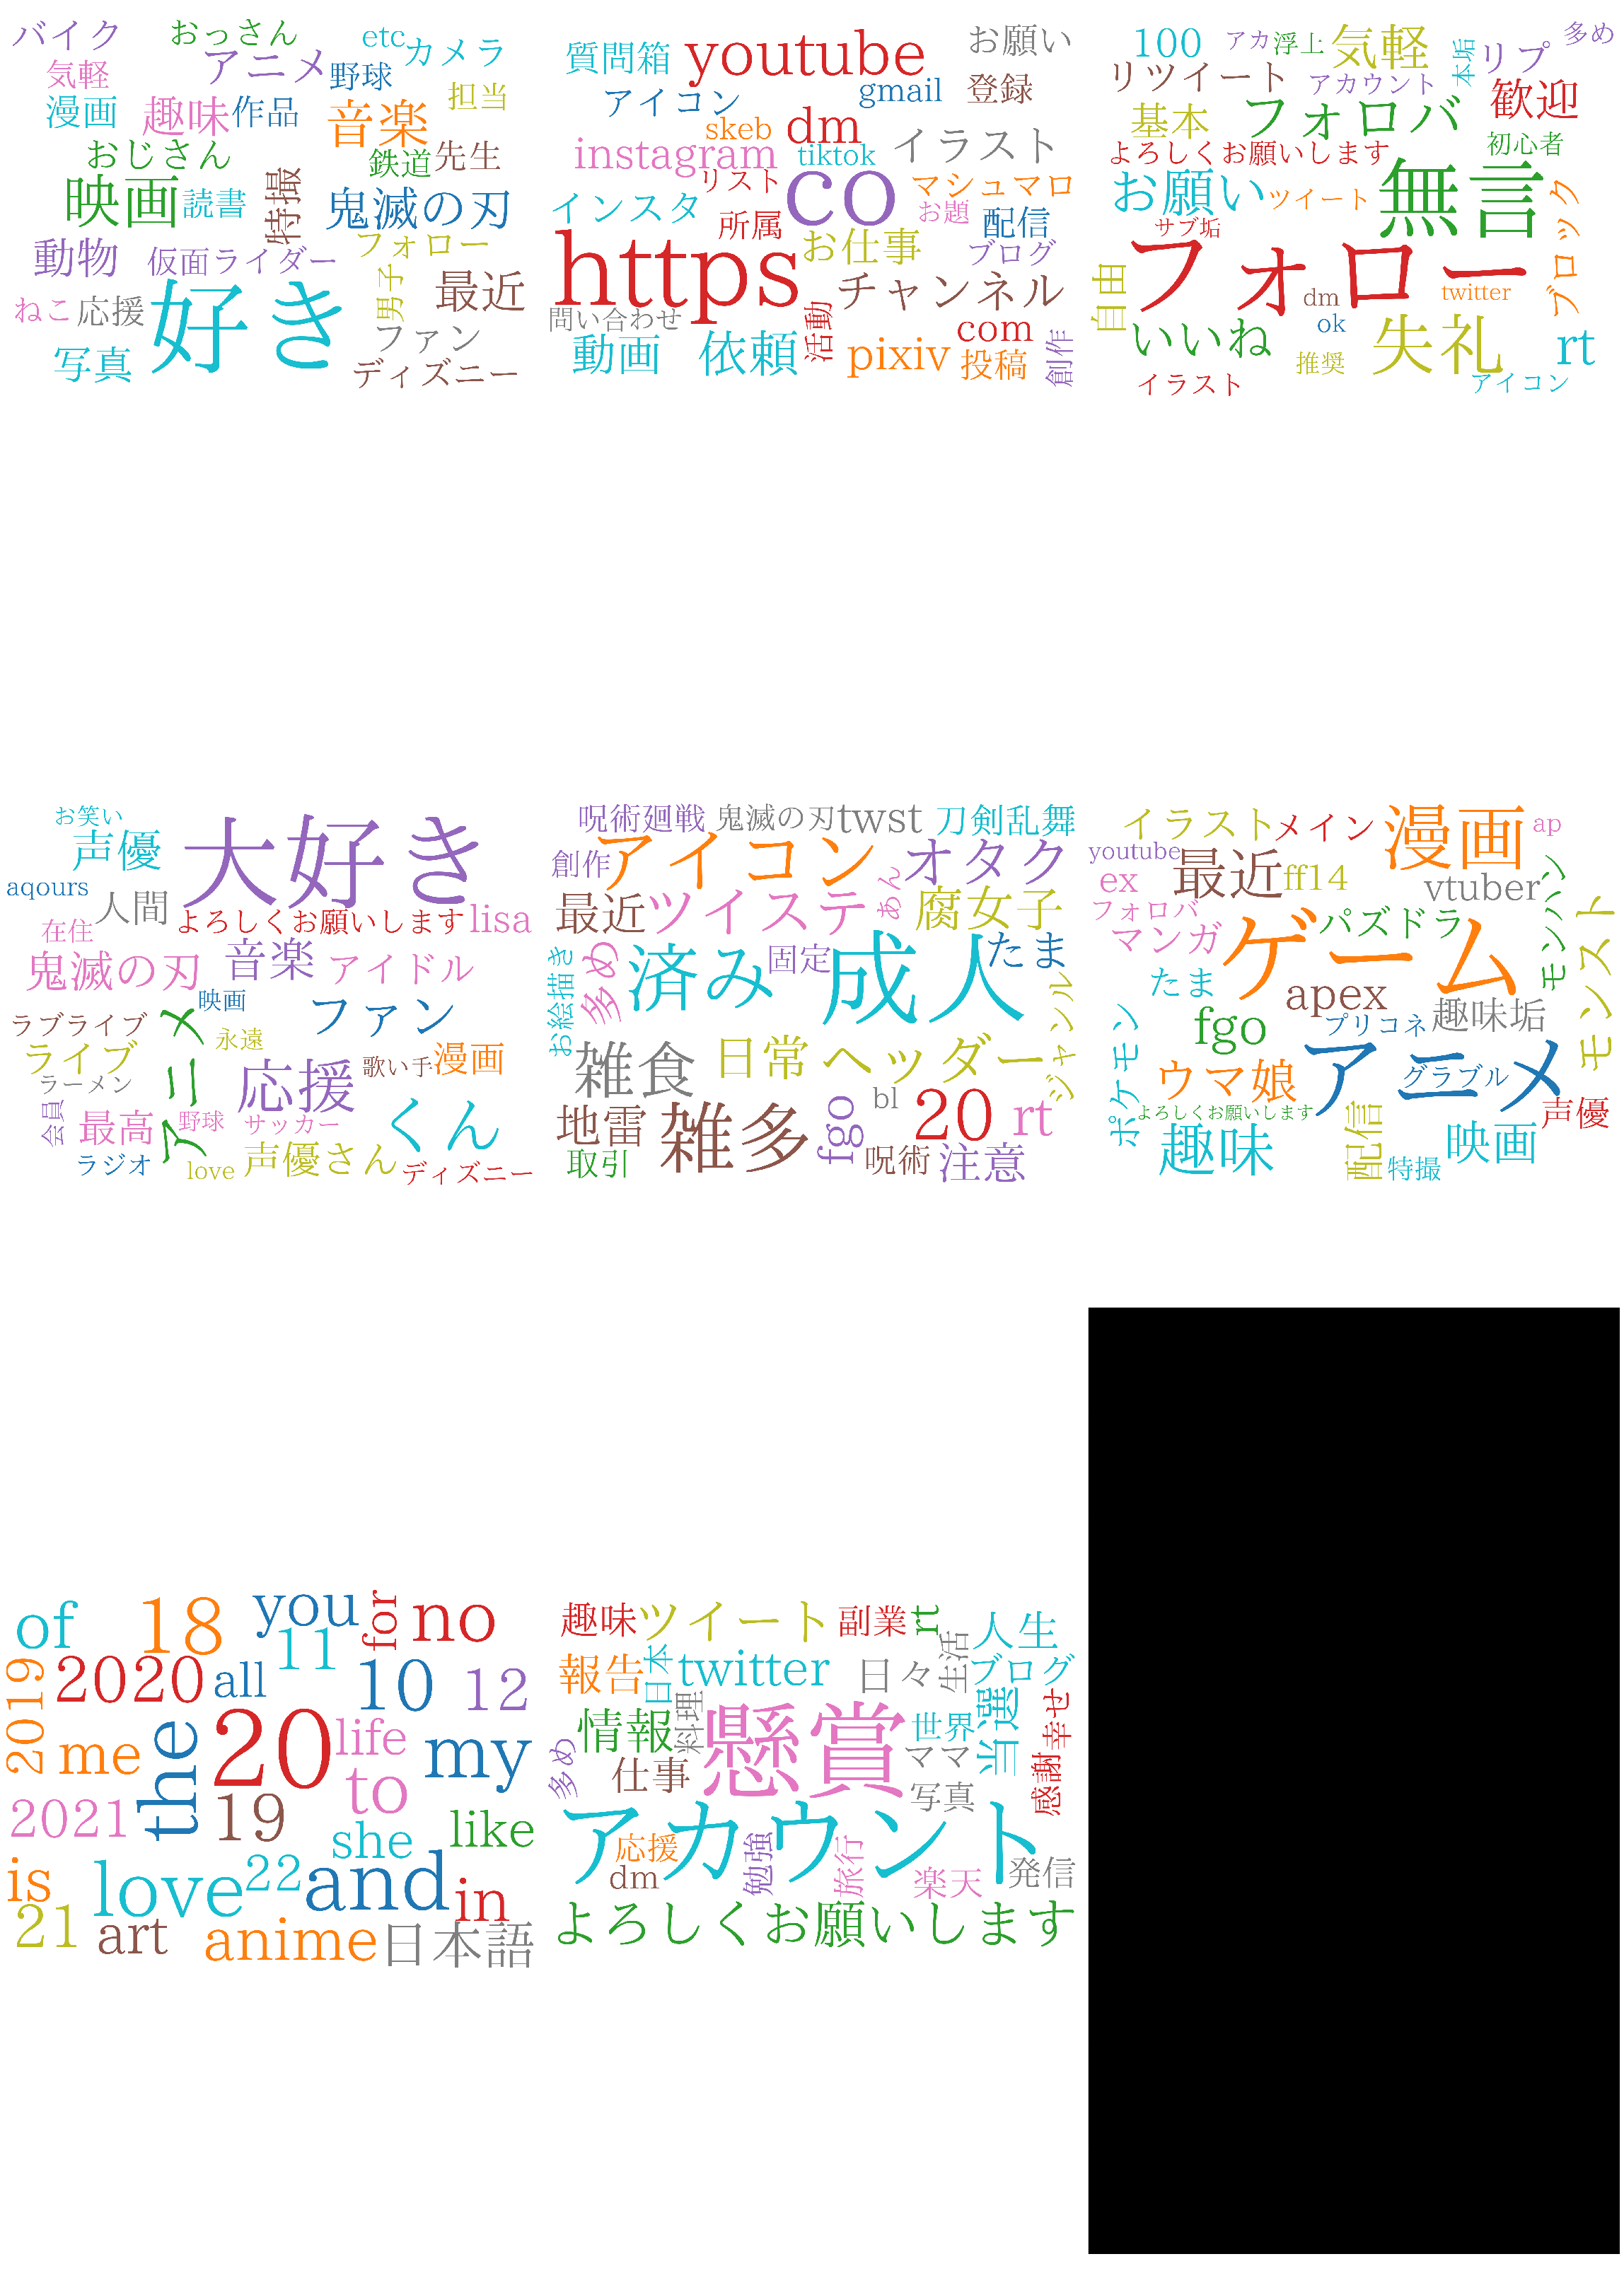

In [29]:
# fig, axes = plt.subplots(10, 2, figsize=(32, 50), sharex=True, sharey=True)
tate = math.ceil(n_components / 3)
fig, axes = plt.subplots(tate, 3, figsize=(32, 50), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    
  if i > len(topic_words)-1:
    break
  fig.add_subplot(ax)
  cloud.generate_from_frequencies(topic_words[i], max_font_size=500)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()

## 11-04 LDA„Åß„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫

### LDA„Å´„Çà„Çã„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫„ÅÆÂÆüË°å

In [30]:
lda = LatentDirichletAllocation(n_components=n_components, 
                                max_iter=30,
                                topic_word_prior=0.25, # „Éà„Éî„ÉÉ„ÇØÊï∞„ÅÆÈÄÜÊï∞„ÅåÁõÆÂÆâ„ÅÆ0.01,0.02,0.05,0.1„Å™„Å©„Å™„Å©Ë©¶„Åô
                                learning_method='online',
                                learning_offset=50,
                                batch_size=1000,# Â§ö„Åè„Åô„Çã
                                # learning_decay : 2??
                                
                                mean_change_tol=1e-4,
                                random_state=1,
                                evaluate_every=1,
                                verbose=1)
# „Éë„É©„É°„Éº„Çø„ÅÆÊØîËºÉ„ÅØperplexity
# „Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøË™øÊï¥„ÇíÈ†ëÂºµ„ÇãÔºÅÔºà„ÇÑ„Å£„Å¶„Çâ„Çå„Å™„ÅÑÔºÅ„Å®„ÅÑ„Çè„Å™„ÅÑÔºÅÔºÅÔºâ

In [31]:
print((f"Fitting LDA models with tf features, "
  f"n_samples={n_samples} and n_features={n_features}"))
t0 = time()
lda.fit(X)
print(f"done in {time() - t0:0.3f}s.")

Fitting LDA models with tf features, n_samples=88481 and n_features=5100
iteration: 1 of max_iter: 30, perplexity: 1678.0427
iteration: 2 of max_iter: 30, perplexity: 1580.9908
iteration: 3 of max_iter: 30, perplexity: 1543.2473
iteration: 4 of max_iter: 30, perplexity: 1523.8411
iteration: 5 of max_iter: 30, perplexity: 1511.8999
iteration: 6 of max_iter: 30, perplexity: 1504.3227
iteration: 7 of max_iter: 30, perplexity: 1499.3217
iteration: 8 of max_iter: 30, perplexity: 1495.7266
iteration: 9 of max_iter: 30, perplexity: 1493.0391
iteration: 10 of max_iter: 30, perplexity: 1491.0210
iteration: 11 of max_iter: 30, perplexity: 1489.3337
iteration: 12 of max_iter: 30, perplexity: 1488.0158
iteration: 13 of max_iter: 30, perplexity: 1486.9328
iteration: 14 of max_iter: 30, perplexity: 1485.9493
iteration: 15 of max_iter: 30, perplexity: 1485.1551
iteration: 16 of max_iter: 30, perplexity: 1484.4410
iteration: 17 of max_iter: 30, perplexity: 1483.8197
iteration: 18 of max_iter: 30, perp

### LDA„ÅÆÂêÑ„Éà„Éî„ÉÉ„ÇØ„Åã„ÇâÈ´òÁ¢∫ÁéáË™û„ÇíÂèñ„ÇäÂá∫„Åô

In [32]:
top_words, weights = get_top_words(lda, vectorizer.get_feature_names())

In [33]:
print(top_words[0])

['Â•Ω„Åç', 'Â§ßÂ•Ω„Åç', 'Êá∏Ë≥û', 'ÂΩìÈÅ∏', '‰∫∫Áîü', 'Â†±Âëä', 'Ë∂£Âë≥', 'lisa', '„Éû„Éû', 'Êó•„ÄÖ', 'ÊóÖË°å', '‰ªï‰∫ã', 'ÊñôÁêÜ', 'Âπ∏„Åõ', 'ÊÅØÂ≠ê', 'ÂÆ∂Êóè', '„ÅäÈÖí', 'ÊÑüË¨ù', '„Éê„Ç§„ÇØ', '‰∏ªÂ©¶', 'ÁîüÊ¥ª', 'Èü≥Ê•Ω', 'Á≠ã„Éà„É¨', 'ÊúÄËøë', 'Â≠ê‰æõ', 'Â≠êËÇ≤„Å¶', 'Âú®‰Ωè', 'ÁæéÂÆπ', 'ÂâØÊ•≠', 'go']


In [34]:
topic_words = [dict(zip(top_words[i], weights[i])) for i in range(n_components)]

### È´òÁ¢∫ÁéáË™û„Çí„ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÅßÂèØË¶ñÂåñ

In [35]:
cloud = WordCloud(stopwords=STOPWORDS,
                                font_path=FONT_PATH,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10'
                  )

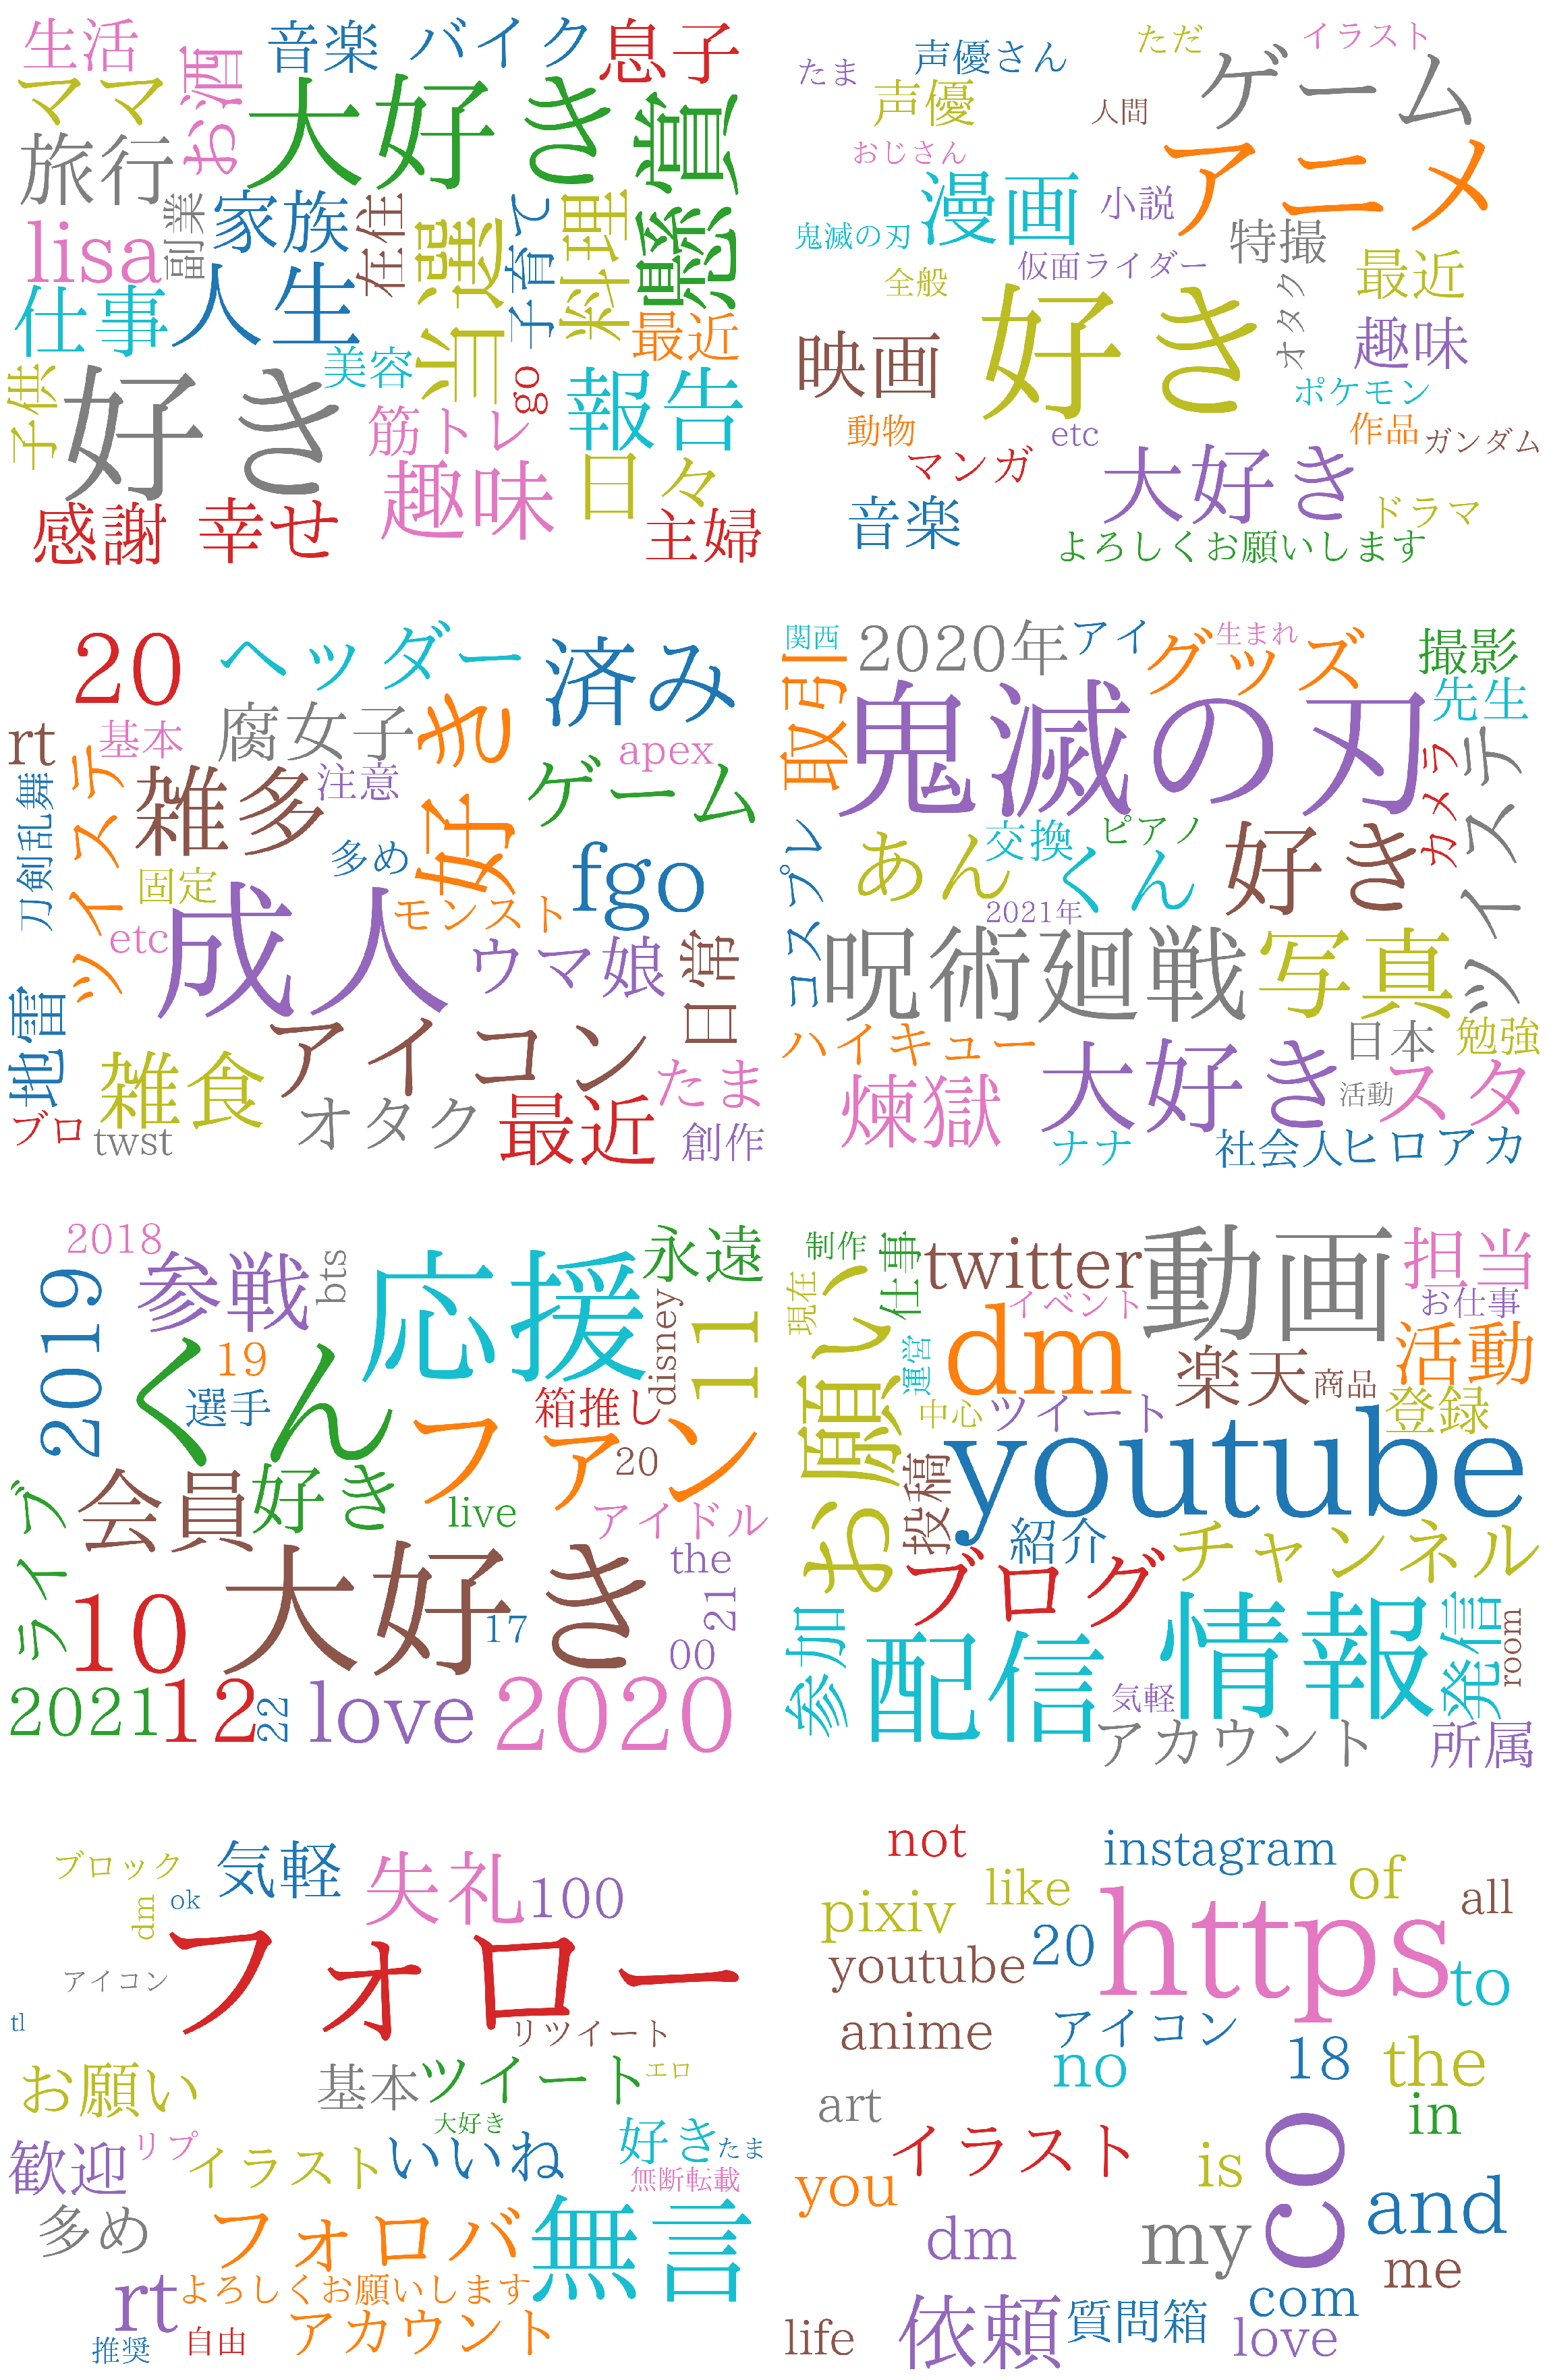

In [36]:
# fig, axes = plt.subplots(5, 4, figsize=(16, 25), sharex=True, sharey=True)
tate = math.ceil(n_components / 2)
fig, axes = plt.subplots(tate, 2, figsize=(32, 50), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    
  if i > len(topic_words)-1:
    break

  fig.add_subplot(ax)
  cloud.generate_from_frequencies(topic_words[i], max_font_size=500)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()


from matplotlib.backends.backend_pdf import PdfPages

import datetime
pdf = PdfPages( 
(datetime.datetime.now() + datetime.timedelta(hours=9) ) .strftime('%m%d_%H%M') + 'topic.pdf')


fignums = plt.get_fignums()
for fignum in fignums:
    plt.figure(fignum)
    pdf.savefig()

pdf.close()

In [37]:
top_words, weights = get_top_words(lda, vectorizer.get_feature_names(), 100)

In [38]:
def get_top_prof (topic_idx, top_n = 100):
    
    topics = lda.transform(X)
    prof_idx_list = topics[:, topic_idx].argsort()[:-top_n - 1:-1]
    return [docs[d] for d in prof_idx_list]

In [39]:
import pickle

file_name = (datetime.datetime.now() + datetime.timedelta(hours=9) ) .strftime('%m%d_%H%M') + '_lda.pickle'
with open(file_name, mode="wb") as f:
    pickle.dump(lda, f)

In [40]:
get_top_prof(0, 20)

['„É©„Éñ„É©„Ç§„ÉñÂ•Ω„Åç„Å™‰∫∫„Äú‰ª≤ËâØ„Åè„Åó„Å¶„Äú Œº‚Äôs‚Üí„Åì„Å®„Çä(„Éª8„Éª) Aqours‚Üí„É®„Éè„ÉçÊé®„Åó „Äé„ÇÆ„É©„Çã„Çì„Äè„ÅÜ„Åø„Åæ„Çã„Åï„Çì„Å´ÂëΩÂêç„Åó„Å¶„ÅÑ„Åü„Å†„Åç„Åæ„Åó„ÅüÔºÅ „É©„Ç§„Éê„Éº„ÅÆÊñπ„Éï„Ç©„É≠„Éê„Åó„Åæ„ÅôüòÜ Êé®„Åó‰ΩúÂÆ∂‚Üí„Éü„É´ÂÖàÁîü„Éª„Å∂„Åù„ÇìÂÖàÁîüÔºÅüî•üî•üî• £∑ìÊúà„Åì„Åë„Åó„Åï„ÇìÊøÄÊé®„Åó‚ú®‚ú® ÁÑ°Ë®Ä„Éï„Ç©„É≠„ÉºÂ§±Á§º„Åó„Åæ„Åô„ÄÇm(_ _)m',
 'Èñ¢Ë•øÂú®‰Ωè„ÅÆÂ§´Â∞èÂ®ò‰ªò„ÅÆÊàê‰∫∫Ê∏à„Åä„Å∞„ÅØ„ÇìÁå´Â•Ω„ÄÅÂè™‰ªäÈäÄÈ≠Ç„ÄÅÊ≤ñÁ•ûÊ≤º‰∏≠ „Åü„Åæ„Å´ÂÆ∂Êóè„ÄÅÂ•Ω„Åç„Å™Áâ©Á≠â„Åó„Çá„ÅÜ„ÇÇ„Å™„ÅÑ„Åì„Å®„ÇíÂëü„Åç„Åæ„Åô„ÄÇ„ÅäËøî‰∫ãÈÅÖ„ÅèÂãùÊâã„Éï„Ç©„É≠„Éº„Åó„Åæ„Åôüôè\n„Ç¢„Ç§„Ç≥„É≥„ÅØ„Å§„Çã„Å®„Çì„Åü„Çì„Åï„Çì„Åã„Çâ„Éò„ÉÉ„ÉÄ„Éº„ÅØÊöóÈªí„Åï„Çì„Åã„Çâ„ÅÆÈ†Ç„ÅçÁâ©„Åß„Åô„ÅÆ„ÅßËª¢ËºâÁ≠âÂæ°ÈÅ†ÊÖÆÈ°ò„ÅÑ„Åæ„Åôüôè',
 'ËøëÁïøÂúèÂú®‰Ωè50‰ª£Áîü‰∏ª„ÄÇ‰ªäÂπ¥„Åß„Éã„Ç≥ÁîüÊ≠¥12Âπ¥ÁõÆ„ÄÇÈÖç‰ø°ËÄÖÊ≠¥6Âπ¥ÁõÆ„Åß„Åô ‰∏ª„Å´ÈõëË´á„É°„Ç§„É≥„ÅÆÊîæÈÄÅ„Åó„Åæ„Åô„ÄÇ',
 '„Çµ„ÉÉ„Ç´„ÉºÂ•Ω„ÅçÔºÅ„Åß„ÇÇ„ÇÑ„Çã„ÅÆ„ÅØËã¶ÊâãüòÅ Ë∂£Âë≥„ÅØ„Çµ„ÉÉ„Ç´„ÉºË¶≥Êà¶„ÄÅÊº´Áîª„ÄÅ„Ç¢„Éã„É°„ÄÅ„Ç≤„Éº„É†„ÄÅÊò†ÁîªÈëëË≥û„ÄÅ„Éï„Ç£„ÇÆ„É•„Ç¢

In [41]:
get_top_prof(1, 20)

['„Åæ„Å©„Åã„Åß„Åô17‚ôÄÔΩú‰Ωï„ÇÇÂèñ„ÇäÊüÑ„ÅÆ„Å™„ÅÑË™ûÂΩôÂäõ5Ê≠≥ÂÖêÊú™Ê∫Ä„Åå„Åì„Åì„Å´„ÅÑ„Åæ„Åôü§™ÔΩúÊé®„Åó„Å´„ÇÅ„Çç„ÇÅ„Çç„Å™ÔΩ±ÔæÜÔΩ¶ÔæÄ„Åß„ÅôüòáÔΩúÊ≠å„ÅÑÊâã„Åï„ÇìÔΩ¶ÔæÄÔΩ∏„Åß„ÇÇ„ÅÇ„Çä„Åæ„Åô‚ÜêÔΩúÔæåÔΩ´ÔæÑÔæÖüî´C2S2„Åã„ÇâüôåüèªüôÜüèª\u200d‚ôÄÔ∏è„Åº„Å£„Å°ÔæåÔæüÔæöÔΩ≤ÔæîÔΩ∞„Å™„ÅÜüò∑ÔΩúSwitchÂÖºÔæåÔæüÔæöÔΩΩÔæÉÊ∞ëÔΩú',
 'Âàù„ÇÅ„Åæ„Åó„Å¶üòã 5.3Ê≠≥„Åæ„Åæ„Åß„Åôüòä ÈªíËâ≤„Åô„Åø„Çå„Å°„ÇÉ„Çì„ÇíÂ®ò„Å®‰∏ÄÁ∑í„Å´ÂøúÊè¥„Åó„Å¶„ÅÑ„Åæ„ÅôüòÑ „Éí„Ç∞„ÉÅ„É¶„Ç¶„Ç≥„Åï„Çì„ÇÇÂ•Ω„Åç„Åß„ÅôüòÑÊúÄËøë„Éñ„É©„Ç§„Çπ„Å°„ÇÉ„Çì„ÄÅ„Çä„Åã„Å°„ÇÉ„Çì„Å´„Éè„Éû„Çä„Åæ„Åó„Åü„ÄÇ‰ª≤ËâØ„Åè„Åó„Å¶„Åè„Å†„Åï„ÅÑ„Å≠üíì',
 '2010Âπ¥ ‰∏ÄÈÄî„Å™Áî∑Â≠ê‚òÖ2014Âπ¥ „Åä„Åó„ÇÉ„Çå„Å™Â•≥Â≠ê‚òÖ Èü≥Ê•Ω„Å®ÊóÖË°å„Å®„Éá„Ç£„Ç∫„Éã„Éº„Å®„Éâ„É©„Ç§„Éñ„ÅåÂ§ßÂ•Ω„Åç(‚âßŒµ‚â¶)ËÇ≤ÂÖêÊôÇ„ÄÖ„É¢„É≥„Éè„É≥‚ô™MHXXÔºÜMHWÔºÜ„É¢„É≥„Éè„É≥„É©„Ç§„Ç∫Ë∂ÖÂàùÂøÉËÄÖ‚Ä¶!!„Åè„Å°„Çá‰∏ãÊâã!!!!„ÅäÊâã‰ºù„ÅÑ„ÅäÈ°ò„ÅÑ„Åó„Åæ„Åô„Å£!!!!Ë∂Ö„Ç®„É≥„Ç∏„Éß„Ç§Âã¢‚ô™ GLAY HISASHIÊøÄÊé®„Åó„ÄÇfollow me(*‚óèËâ∏‚àÄ$)‚ô™ ‰∏ã„ÅØË≥™ÂïèÁÆ±‚ô•Ô∏è‚ô•Ô∏è',
 'Ë∂£Âë≥„ÅßÂ§ß‰∫∫Âêë„ÅëÂ∞èË™¨„ÇíÊõ∏„ÅÑ„Å¶„ÅÑ„

In [42]:
get_top_prof(2, 20)

[nan,
 '„Ç¢„Éã„É°„ÄÅÂ£∞ÂÑ™„Åï„ÇìÂ§ßÂ•Ω„Åç„Åß„Åô„ÄÇ  \nÂØ∫Â≥∂ÊÉáÂ§™„Åï„Çì„ÄÅÁ´ãËä±ÊÖé‰πã‰ªã„Åï„Çì„ÄÅÁü¢ÈáéÂ•®Âêæ„Åï„Çì„ÄÅÂÜÖÁî∞ÈõÑÈ¶¨„Åï„Çì„ÄÅÂ∞èÈáéÂèãÊ®π„Åï„Çì„ÄÅÊñ∞Âû£Ê®ΩÂä©„Åï„Çì„ÄÅÈ´òÊ©ãÂ∫ÉÊ®π„Åï„Çì„ÄÅÊó•ÈáéËÅ°„Åï„Çì„ÄÅÊ±üÂè£Êãì‰πü„Åï„Çì\n#„ÇÆ„É¥„É≥ ‚ù§Á´ãÂ§è&ÁúüÂÜ¨ÂøúÊè¥Âõ£‚ú®\n#„Çª„É≥„ÉÅ„Éü„É™„É°„É≥„Çø„É´ ‚ù§\n#Êù±‰∫¨Âçç„É™„Éô„É≥„Ç∏„É£„Éº„Ç∫ „Éû„Ç§„Ç≠„Éº„ÄÅ„Éâ„É©„Ç±„É≥‚ù§\n            \nÂ•Ω„Åç„Å™‰ø≥ÂÑ™:Áî∫Áî∞ÂïìÂ§™„Åï„Çì‚ù§',
 'Èà¥Êú®Á¶è„Åè„Çì„ÅÆÂ§ß„Éï„Ç°„É≥„Åß„ÅôÔºÅ Âè∞Êπæ‰∫∫„Åß„ÅôÔºÅÔºÅ\u3000',
 'PS5Ê¨≤„Åó„ÅÑ',
 '„ÄêÈü≥Ê•Ω„Äë‚ÜíÈÉΩÂÜÖ„Å´„Å¶New„Ç¢„É´„Éê„É†Ë£Ω‰Ωú‰∏≠ÔºÅ\nmy„Éê„É≥„Éâ‚Üí„ÄêÊïëÊ∏àÈ≠îÁ•ûyayoi„Äë‚Üí@931_BAND\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n„ÄêÊ¥ªÂãï„Äë‚ÜíÁã¨Ë™û„ÄÅÁôªÂ±±„ÄÅÊº´Áîª„ÄÅ„Ç¢„Éã„É°„ÄÅ„Éù„Ç±„É¢„É≥„ÄÅ„Éö„ÉÉ„Éà(Áä¨)„ÄÅ„É°„ÉÄ„Ç´„ÄÅ„Éì„Ç™„Éà„Éº„Éó„ÄÅ„Ç¢„ÇØ„Ç¢„ÉÜ„É©„É™„Ç¶„É†„ÄÅ„É¢„É≥„Éè„É≥„ÄÅ‰ΩúÊõ≤„ÄÅ„Éê„É≥„Éâ„ÄÇ',
 nan,
 'ÁµµÊèè„Åè„ÅÆÂ•Ω„Åç„Åß„Åô\n„ÅÇ„Å®„ÄÅ„Ç≤„Éº„É†„Åß„ÅØ„ÉÑ„É†„ÉÑ„É†„Å®„Éñ„É≠„Çπ„Çø„Çí„Çà„Åè„ÇÑ„Å£„Å¶„Åæ„Åô',
 'Ê¥ãÁîª„ÅßË∂ÖÂÅèÂóúÂ•Ω„ÅßÈÄ£Á∂öTW„Åô„ÇãÊò†Áî

In [43]:
get_top_prof(3, 20)

['King ÔºÜ Prince„ÅÆÂπ≥ÈáéÁ¥´ËÄÄ„ÄÅÊ∞∏ÈáéËäΩÈÉÅ„ÄÅ ÊñáË±™„Çπ„Éà„É¨„Ç§„Éâ„ÉÉ„Ç∞„Çπ„ÄÅÊñáË±™„Å®„Ç¢„É´„Ç±„Éü„Çπ„Éà„ÄÅfree„ÄÅ„Åù„ÅÆ‰ªñË´∏„ÄÖÂ§ßÂ•Ω„Åç„Åß„Åô‚ù£Ô∏è„Åü„Åè„Åï„ÇìÁµ°„ÇÅ„Çã„Å®Â¨â„Åó„ÅÑ„Åß„ÅôÔºÅ',
 '„ÇÇ„Çç„ÇÇ„Çç„ÅÆ„Ç¢„Ç´„Ç¶„É≥„Éà„Åß„Åô',
 'Ê¥ãÊ•Ωüá∫üá∏üá¨üáßÔºèÊó•Êú¨„ÅÆÊ≠åüáØüáµÔºèFree Soulüé§ÔºèDisco MusicüåÉÔºèJazzüé∑Ôºècoffee‚òïÔºè„Çµ„ÉÉ„Ç´„Éº‚öΩÔºèÊ†ÉÊú®ÁæéÂ•≥üë©ÔºèüéµTOCHIGI GROOVEüé∂Ôºè(„Ç¢„Ç§„Ç≥„É≥„ÅØ„Äå„Å®„Å°„Åä„Å®„ÇÅ„Äç„Éò„ÉÉ„ÉÄ„Éº„ÅØ„ÄåÊ≠£Âó£„ÅÆ„Åé„Çá„ÅÜ„Åñ„Äç)',
 'Â•Ω„Åç„Å™„ÇÇ„ÅÆ„ÇíÂ•Ω„Åç„Å™„Å†„ÅëÊé®„Åó„Å¶„Å™„Å´„ÅåÊÇ™„ÅÑÔΩØÔΩØÔΩØÔºÅÔºÅÔºÅÔºÅÔºÅ',
 '„ÉÄ„É≥„ÇπÔºÜ„É≠„ÉÉ„ÇØ„É°„Çø„É´„Éê„É≥„ÉâASURAÔºà@ASURA2033Ôºâ„Åß„Éô„Éº„Çπ„ÇíÂºæ„ÅÑ„Å¶„Åä„Çä„Åæ„Åô‚ô™    youtube„Åß„Éô„Éº„Çπ„Ç´„Éê„ÉºÂßã„ÇÅ„Åæ„Åó„Åüüí° https://t.co/IvyXF7aSkA',
 'Á•û„Å®Âêç‰πó„Å£„Å¶„Åæ„Åôü•¥„Éï„Ç©„É≠„Éê100%ÔºÅÂÄã„ÉÑ„Ç§Ë¶ã„Å¶„Å≠ÔºÅÔºÅÁõ∏Ê£í‚Üí(Ôº†kotanuki_0620)„Ç≤„Éº„É†Âû¢‚Üí(@Akaneko_100)',
 '‡∏°‡∏¥‡∏ô 18‚¨áÔ∏è (Multidom)  ‡∏Ñ‡∏π‡πà‡∏ä‡∏¥‡∏õ‡πÇ‡∏û‡πÑ‡∏°‡πà‡πÅ‡∏°‡∏™| INFP\u200b  üìç:JJK BC MHA\u20

In [44]:
get_top_prof(4, 20)

['Tricking.Performer  Â§ßÂíå„Éà„É™„ÉÉ„Ç≠„É≥„Ç∞ÊïôÂÆ§Ë¨õÂ∏´',
 'Ôºª MANGA / Illustration ÔºΩÔºªhttps://t.co/p6vBFDmN2ZÔºΩ',
 'Êº´Áîª / „Ç¢„Éã„É° / Â£∞ÂÑ™ / 2Ê¨°ÂÖÉ„ÄÅ2.5Ê¨°ÂÖÉ„Å´ÂøÉË∫´„Å®„ÇÇ„Å´ÊîØ„Åà„Çâ„Çå„Å¶„ÅÑ„Åæ„Åô „Åü„Åæ„Å´„Ç§„É©„Çπ„ÉàÊäï‰∏ã„Åó„Åæ„Åô ÁÑ°Ë®Ä„Éï„Ç©„É≠„Éº„Åô„ÅÑ„Åæ„Åõ„Çì Êú¨Âû¢„Åß„ÅØ„ÄÅ„Å™„Åã„Å™„Åã„Å§„Å∂„ÇÑ„Åë„Å™„ÅÑ„ÅÇ„Çì„Å™„Åì„Å®„Åù„Çì„Å™„Åì„Å®„ÄÅ„Åï„Çâ„ÅëÂá∫„Åó„Åü„ÅÑ„Å®ÊÄù„ÅÑ„Åæ„Åô„ÄÇ',
 'Á§æ‰ºö‰∫∫„Åß„Åô„ÄÇ\nÊú¨„Åü„Åè„Åï„ÇìË™≠„Åø„Åü„ÅÑ(È°òÊúõ)',
 'Ë§áÂêàÂûã„É™„É¶„Éº„Çπ„Ç∑„Éß„ÉÉ„Éó„Äé„ÅäÂÆùÂ∏ÇÁï™È§®„Äè„Å´„Å¶Âñ∂Ê•≠„Åó„Å¶„Åä„Çä„Åæ„Åô‚ò∫Ô∏è„É´„Ç§„É¥„Ç£„Éà„É≥„ÇÑ„Ç∑„É£„Éç„É´„ÄÅ„Ç∞„ÉÉ„ÉÅ„ÇÑ„Ç≥„Éº„ÉÅetc „Éñ„É©„É≥„Éâ„Éê„ÉÉ„Ç∞„ÉªË≤°Â∏É„Éª„Ç¢„ÇØ„Çª„Çµ„É™„Éº„ÇíÁõÆ‰∏ãË≤∑Âèñ„ÄÅË≤©Â£≤‰∏≠‚ú®Áúå‰∏ãÊúÄÂ§ßÁ¥ö„ÅÆÂú®Â∫´Èáè„Åß„ÅäËøé„ÅàËá¥„Åó„Åæ„Åô„ÅÆ„Åß„Åú„Å≤‰∏ÄÂ∫¶„ÅîÊù•Â∫ó‰∏ã„Åï„ÅÑüôá\u200d‚ôÇÔ∏èüôá\u200d‚ôÄÔ∏è',
 'Ëù∂ÁµêÂõΩ„ÅÆÂ±ÖÈÖíÂ±ãÂ∫ó‰∏ª\n\nÈÖç‰ø°„Ç¢„Éó„É™„Éà„Éî„Ç¢„ÅßÊ≠å„ÅÆÈÖç‰ø°„Çí„ÇÑ„Å£„Å¶„Åæ„ÅôÔºÅ\n‰ªï‰∫ãÁµÇ„Çè„Çä„ÇÑ„ÄÅ‰ºë„Åø„ÅÆÊó•„Å´ÈÖç‰ø°„Åó„Å¶„Åæ„ÅôÔºÅ\nTwitter„Åß„ÅØ‰∏ª„Å´„Ç≤

In [45]:
get_top_prof(5, 20)

['„Éï„Ç©„Éº„Éà„Éä„Ç§„Éà„ÅÆ„ÇØ„É©„É≥„ÄåRapier„ÄçÊâÄÂ±û„ÅÆ„Åè„Äú„Åï„Çì„Åß„ÅôÔºÅ‰∏ª„Å´„ÇÑ„Å£„Å¶„Çã„Ç≤„Éº„É†„ÅØFortnite „Éû„Ç≠„Ç™„É≥ ÊúÄËøë„Ç®„Éö„Å´„Éè„Éû„Çä„Å§„Å§„ÅÇ„Çä„Åæ„ÅôÔºÅ „Éû„Ç≠„Ç™„É≥„ÅÑ„Å§„Åß„ÇÇÂãüÈõÜ„Åó„Å¶„Åæ„ÅôÔºÅ',
 'ÊúΩ„Å°„Å¶„ÇÜ„Åè„Å™„Çâ„Å∞„ÄÅ‰Ωï„Åã„ÇíÈÅ∫„Åï„Å™„Åè„Å¶„ÅØ„ÄÇ„Ç∑„É≥„Ç¨„Éº„ÇΩ„É≥„Ç∞„É©„Ç§„Çø„Éºüåπ\n#KIRIA #KIRIAÈöä #mask_villain\nÊ•ΩÊõ≤„Éª„Ç∞„ÉÉ„Ç∫‚áíhttps://t.co/IPYXIXjrN6 „Åï„ÅÅ„ÄÅÂÉï„ÅÆÊâÄ„Åæ„ÅßÂ†ï„Å°„Å¶„Åä„ÅÑ„Åß„ÄÇ',
 '„Çµ„ÉñÂû¢@sawayakayazyu3 „Ç¢„Ç§„Ç≥„É≥‚Üí @Itati_010010 „ÅØ„Çì',
 'keep your eyes on the stars and your feet on the groundüåå | awkward | „É©„Éï„Å´„É©„Éñ„Çí.. | ÂÖÉ@melequin_n | #„É°„É´„ÅÆÁøªË®≥',
 'Âßã„ÇÅ„Åü„Å∞„Åã„Çä„Åß„ÅôÔºÅ „Çà„Çç„Åó„Åè„ÅäÈ°ò„ÅÑ„Åó„Åæ„ÅôÔºÅ',
 '91-92line ÂÜ®Â≤°ÂÅ•Áøî‚ó°Ãà‚ô•Ô∏é Âπ∏„Åõ„Ç≤„ÉÉ„Éà„Å†„Çà‚ô°„Ç∏„É£„Éã„Éº„Ç∫„Åæ„Çã„Å£„Å®Â§ßÂ•Ω„Åçüíó „Éó„É™„Ç≠„É•„Ç¢„ÇÇÂ•Ω„ÅçüíóÂ§©„ÉéÂ∑ù„Åç„Çâ„Çâ‚≠êÔ∏è',
 'ÈõëÂ§öÂû¢„ÄÇËâ¶„Åì„Çå Fate ÊúàÂß´ È¨ºÊªÖ„ÅÆÂàÉ Áâ©Ë™û„Ç∑„É™„Éº„Ç∫ „Ç¨„É´„Éë„É≥ ‰ø∫„Ç¨„Ç§„É´ „É©„Éñ„É©„Ç§„Éñ! etc‚Ä¶ Êàê‰∫∫Ê∏à‚ôÇ/Êú

In [46]:
nownow_file = (datetime.datetime.now() + datetime.timedelta(hours=9) ).strftime('%m%d_%H%M')+"topic_modeling.ipynb"

!cp ./topic_modeling.ipynb ./jupyter_backup_for_param/$nownow_file